In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('data/Mental Illness Survey 1.csv')
cols_to_check = ['Unnamed: 28', 'Unnamed: 29']
data.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,I have one of the following issues in addition to my illness,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Age,Gender,Household Income,Region,Device Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Response,Response,Response,Response,Open-Ended Response,Response,Response,Response,Response,Response,Open-Ended Response,Open-Ended Response,Response,Response,Open-Ended Response,Response,Response,Open-Ended Response,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Response,Response,Response,Response,Response
1,6.630447e+09,168522804.0,01/15/2018 03:45:16 AM,01/15/2018 03:48:24 AM,NaN,NaN,NaN,NaN,06f645d7ea5af372d50a62bd17,No,High School or GED,No,No,0,No,No,Yes,No,Yes,24,35,Yes,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,Obsessive thinking,NaN,Panic attacks,NaN,NaN,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,6.630410e+09,168522804.0,01/15/2018 03:17:52 AM,01/15/2018 03:18:57 AM,NaN,NaN,NaN,NaN,abca2776418ff1fe24bb85e21f,Yes,Some Phd,Yes,No,0,Yes,No,Yes,No,No,1,22,No,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,NaN,NaN,Panic attacks,NaN,Tiredness,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,6.630402e+09,168522804.0,01/15/2018 03:10:28 AM,01/15/2018 03:12:49 AM,NaN,NaN,NaN,NaN,3800088cf4e55278b38bbe67f3,No,Completed Undergraduate,Yes,No,0,Yes,No,Yes,No,No,0,100,No,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,6.630335e+09,168522804.0,01/15/2018 02:11:16 AM,01/15/2018 02:12:33 AM,NaN,NaN,NaN,NaN,84585803a3cec189f89fe43d44,No,Some Undergraduate,Yes,No,NaN,No,No,Yes,Yes,Yes,11,0,Yes,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop


# Cleaning and Pre-processing Data
There is a lot to take care of with this dataset! Nulls, dtype conversions, label encoding, one-hot encoding...

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 40 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Respondent ID                                                 334 non-null    float64
 1   Collector ID                                                  334 non-null    float64
 2   Start Date                                                    334 non-null    object 
 3   End Date                                                      334 non-null    object 
 4   IP Address                                                    0 non-null      float64
 5   Email Address                                                 0 non-null      float64
 6   First Name                                                    0 non-null      float64
 7   Last Name                                                     0 non-nul

We see that row 1 is not data but a secondary header. The only relevant data it appears to contain is the col names for symptoms (Depression, Anxiety, Obssesive Thoughts...).

So drop the first row and rename those columns.

In [4]:
data.drop(axis=0, index=0, inplace=True)
data.rename(columns={'Unnamed: 28':'Anxiety',
                     'Unnamed: 29':'Depression',
                     'Unnamed: 30':'Obsessive_thinking',
                     'Unnamed: 31':'Mood_swings',
                     'Unnamed: 32':'Panic_attacks',
                     'Unnamed: 33':'Compulsive_behavior',
                     'Unnamed: 34':'Tiredness',
                     data.columns[27] : 'Lack of concentration',
                     data.columns[19] : 'Total gaps in resume in months', # this col name was causing problems so need to rename
                    }, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 1 to 334
Data columns (total 40 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Respondent ID                                                 334 non-null    float64
 1   Collector ID                                                  334 non-null    float64
 2   Start Date                                                    334 non-null    object 
 3   End Date                                                      334 non-null    object 
 4   IP Address                                                    0 non-null      float64
 5   Email Address                                                 0 non-null      float64
 6   First Name                                                    0 non-null      float64
 7   Last Name                                                     0 non-nul

In [6]:
print("Sum of nulls per col:")
for col in data.columns:
    if data[col].isnull().sum() > 0:
        print(f'{col} : {data[col].isnull().sum()}')

Sum of nulls per col:
IP Address : 334
Email Address : 334
First Name : 334
Last Name : 334
How many days were you hospitalized for your mental illness : 37
Lack of concentration : 283
Anxiety : 234
Depression : 248
Obsessive_thinking : 292
Mood_swings : 296
Panic_attacks : 285
Compulsive_behavior : 305
Tiredness : 234
Region : 2


In [7]:
# col index 27 has 283 nulls and is "I have one of the following issues in addition to my illness"
# so add it to the list of cols to be renamed so can use as a symptom feature
data.iloc[:, 27].value_counts()

Lack of concentration    51
Name: Lack of concentration, dtype: int64

In [8]:
data['Collector ID'].unique()

array([1.68522804e+08])

After reviewing nulls, let's drop cols: 
IP Address
Email Address
First Name
Last name

Also drop:<br>
Responent ID - unhelpful<br>
Collector ID - there is only 1 value here<br>
Custom Data 1 - we don't know what this represents

Rename "I have one of the following issues in addition to my illness" to "Lack of concentration"


In [9]:
cols_to_drop = ['Respondent ID','IP Address', 'Email Address', 'First Name', 'Last Name', 'Collector ID', 'Custom Data 1']
data.drop(cols_to_drop, axis=1, inplace=True)

In [10]:
cols_to_fill = ['Anxiety',
                'Depression',
                'Obsessive_thinking',
                'Mood_swings',
                'Panic_attacks',
                'Compulsive_behavior',
                'Tiredness',
                'Lack of concentration']

#data_clean = data[cols_to_fill].fillna(0, axis=1)
#data_clean = data.copy()

In [11]:
for col in cols_to_fill:
    data[col].fillna(0, inplace=True)
    data[col] = data[col].apply(lambda x : 0 if x == 0 else 1)

In [12]:
data.head()

,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
1,01/15/2018 03:45:16 AM,01/15/2018 03:48:24 AM,No,High School or GED,No,No,0,No,No,Yes,No,Yes,24,35,Yes,Yes,0,No,No,0,1,1,1,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,01/15/2018 03:17:52 AM,01/15/2018 03:18:57 AM,Yes,Some Phd,Yes,No,0,Yes,No,Yes,No,No,1,22,No,Yes,0,No,No,0,1,1,1,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,01/15/2018 03:10:28 AM,01/15/2018 03:12:49 AM,No,Completed Undergraduate,Yes,No,0,Yes,No,Yes,No,No,0,100,No,Yes,0,No,No,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,01/15/2018 02:11:16 AM,01/15/2018 02:12:33 AM,No,Some Undergraduate,Yes,No,NaN,No,No,Yes,Yes,Yes,11,0,Yes,Yes,0,No,No,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
5,01/15/2018 01:24:12 AM,01/15/2018 01:26:34 AM,Yes,Completed Undergraduate,Yes,Yes,35,Yes,Yes,Yes,No,Yes,33,32,No,Yes,30,No,No,4,1,1,1,1,1,1,1,1,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


A lot of columns have "yes"/"no" answers so let's convert those to binary labels

In [13]:
from sklearn.preprocessing import LabelBinarizer
binary_cols = ['I identify as having a mental illness', 
               'I have my own computer separate from a smart phone',
               'I have been hospitalized before for my mental illness', 
               'I am currently employed at least part-time',
               'I am legally disabled',
               'I have my regular access to the internet',
               'I live with my parents',
               'I have a gap in my resume',
               'I am unemployed',
               'I read outside of work and school',
               'I receive food stamps',
               'I am on section 8 housing'
              ]
le = LabelBinarizer()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

In [14]:
data.head()

,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
1,01/15/2018 03:45:16 AM,01/15/2018 03:48:24 AM,0,High School or GED,0,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,01/15/2018 03:17:52 AM,01/15/2018 03:18:57 AM,1,Some Phd,1,0,0,1,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,01/15/2018 03:10:28 AM,01/15/2018 03:12:49 AM,0,Completed Undergraduate,1,0,0,1,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,01/15/2018 02:11:16 AM,01/15/2018 02:12:33 AM,0,Some Undergraduate,1,0,NaN,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
5,01/15/2018 01:24:12 AM,01/15/2018 01:26:34 AM,1,Completed Undergraduate,1,1,35,1,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


Now let's deal with the nulls in the remaining columns "How many days were you hospitalized for your mental illness" and 'Region'

In [15]:
# If impute with the mean, what will it be?
x = data['How many days were you hospitalized for your mental illness']
x.dropna()
x2 = pd.to_numeric(x)
x2.mean()

3.276094276094276

In [16]:
# let's check this against the similar yes/no question.
data['I have been hospitalized before for my mental illness'][data['How many days were you hospitalized for your mental illness'].isna()]

4      0
11     0
16     0
20     0
28     0
30     0
32     0
36     0
46     0
64     0
91     0
98     0
110    0
112    0
118    0
127    0
163    0
176    0
183    0
186    0
199    0
203    0
206    0
208    0
226    0
232    0
234    0
250    0
264    0
266    1
271    0
282    0
283    0
293    0
298    0
315    0
330    0
Name: I have been hospitalized before for my mental illness, dtype: int64

All but one person said yes to hospitalization and didn't report the days (i.e. null for days)
- drop this record and fill 0 for the rest

In [17]:
data.drop(index=266, axis=0)
data['How many days were you hospitalized for your mental illness'].fillna(0, inplace=True)

In [18]:
# only 2 regions with nulls - drop these since it is so few
data.dropna(subset=['Region'], axis=0, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1 to 334
Data columns (total 33 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Start Date                                                    332 non-null    object
 1   End Date                                                      332 non-null    object
 2   I identify as having a mental illness                         332 non-null    int64 
 3   Education                                                     332 non-null    object
 4   I have my own computer separate from a smart phone            332 non-null    int64 
 5   I have been hospitalized before for my mental illness         332 non-null    int64 
 6   How many days were you hospitalized for your mental illness   332 non-null    object
 7   I am currently employed at least part-time                    332 non-null    in

And let's convert appropriate cols to integers

In [20]:
# This won't work for some reason... pretty sure but with pandas
data.astype({'How many days were you hospitalized for your mental illness':'int32',
             'Total gaps in resume in months': 'int64',
             'Annual income (including any social welfare programs) in USD': 'int32',
             'Annual income from social welfare programs': 'int32',
             'How many times were you hospitalized for your mental illness': 'int32'
            })

,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
1,01/15/2018 03:45:16 AM,01/15/2018 03:48:24 AM,0,High School or GED,0,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,01/15/2018 03:17:52 AM,01/15/2018 03:18:57 AM,1,Some Phd,1,0,0,1,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,01/15/2018 03:10:28 AM,01/15/2018 03:12:49 AM,0,Completed Undergraduate,1,0,0,1,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,01/15/2018 02:11:16 AM,01/15/2018 02:12:33 AM,0,Some Undergraduate,1,0,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
5,01/15/2018 01:24:12 AM,01/15/2018 01:26:34 AM,1,Completed Undergraduate,1,1,35,1,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,01/14/2018 03:34:38 AM,01/14/2018 03:36:44 AM,0,High School or GED,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,45-60,Female,Prefer not to answer,Mountain,Android Phone / Tablet
331,01/14/2018 03:34:38 AM,01/14/2018 03:36:09 AM,0,Some Undergraduate,1,0,0,1,0,1,1,0,0,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,18-29,Male,"$50,000-$74,999",Pacific,Windows Desktop / Laptop
332,01/14/2018 03:27:20 AM,01/14/2018 03:33:01 AM,0,Some Undergraduate,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,> 60,Female,"$10,000-$24,999",West North Central,Windows Desktop / Laptop
333,01/14/2018 03:29:31 AM,01/14/2018 03:32:45 AM,1,Some Undergraduate,0,1,1,0,1,1,1,1,30,12,1,1,12,1,0,3,1,1,1,1,1,1,1,1,18-29,Female,"$0-$9,999",West South Central,Android Phone / Tablet


In [21]:
data['How many days were you hospitalized for your mental illness'] = pd.to_numeric(data['How many days were you hospitalized for your mental illness'])
data['Total gaps in resume in months'] = pd.to_numeric(data['Total gaps in resume in months'])
data['Annual income (including any social welfare programs) in USD'] = pd.to_numeric(data['Annual income (including any social welfare programs) in USD'])
data['Annual income from social welfare programs'] = pd.to_numeric(data['Annual income from social welfare programs'])
data['How many times were you hospitalized for your mental illness'] = pd.to_numeric(data['How many times were you hospitalized for your mental illness'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1 to 334
Data columns (total 33 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Start Date                                                    332 non-null    object
 1   End Date                                                      332 non-null    object
 2   I identify as having a mental illness                         332 non-null    int64 
 3   Education                                                     332 non-null    object
 4   I have my own computer separate from a smart phone            332 non-null    int64 
 5   I have been hospitalized before for my mental illness         332 non-null    int64 
 6   How many days were you hospitalized for your mental illness   332 non-null    int64 
 7   I am currently employed at least part-time                    332 non-null    in

Convert dates to datetime dtypes

In [23]:
data['Total gaps in resume in months'].mean()

8.548192771084338

In [24]:
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'])

In [25]:
data['I am unemployed']

1      1
2      0
3      0
4      1
5      0
      ..
330    1
331    0
332    0
333    1
334    0
Name: I am unemployed, Length: 332, dtype: int64

In [26]:
data.columns

Index(['Start Date', 'End Date', 'I identify as having a mental illness',
       'Education', 'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am currently employed at least part-time', 'I am legally disabled',
       'I have my regular access to the internet', 'I live with my parents',
       'I have a gap in my resume', 'Total gaps in resume in months',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive_thinking',
       'Mood_swings', 'Panic_attacks', 'Compulsive_behavior', 'Tiredness',
       'Age', 'Gende

##### RESET index now done dropping rows

In [27]:
data.reset_index(inplace=True, drop=True)
data.head()

,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,2018-01-15 03:45:16,2018-01-15 03:48:24,0,High School or GED,0,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,2018-01-15 03:17:52,2018-01-15 03:18:57,1,Some Phd,1,0,0,1,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,2018-01-15 03:10:28,2018-01-15 03:12:49,0,Completed Undergraduate,1,0,0,1,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,2018-01-15 02:11:16,2018-01-15 02:12:33,0,Some Undergraduate,1,0,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,2018-01-15 01:24:12,2018-01-15 01:26:34,1,Completed Undergraduate,1,1,35,1,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf_class = RandomForestClassifier()

features = ['I identify as having a mental illness', 
            'I have my own computer separate from a smart phone',
            'I have been hospitalized before for my mental illness',
            'I am legally disabled',
            'I have my regular access to the internet',
            'I live with my parents',
            'I have a gap in my resume', 
            'Total gaps in resume in months',
            'Annual income (including any social welfare programs) in USD',
            'I read outside of work and school',
            'Annual income from social welfare programs', 
            'I receive food stamps',
            'I am on section 8 housing',
            'How many times were you hospitalized for your mental illness',
            'Lack of concentration', 
            'Anxiety', 
            'Depression', 
            'Obsessive_thinking',
            'Mood_swings', 
            'Panic_attacks', 
            'Compulsive_behavior', 
            'Tiredness'
           ]

y = data['I am unemployed']
numeric_features = [feat for feat in features if data[feat].dtype in ['int64', 'float64']]
X = data[numeric_features]

In [29]:
numeric_features

['I identify as having a mental illness',
 'I have my own computer separate from a smart phone',
 'I have been hospitalized before for my mental illness',
 'I am legally disabled',
 'I have my regular access to the internet',
 'I live with my parents',
 'I have a gap in my resume',
 'Total gaps in resume in months',
 'Annual income (including any social welfare programs) in USD',
 'I read outside of work and school',
 'Annual income from social welfare programs',
 'I receive food stamps',
 'I am on section 8 housing',
 'How many times were you hospitalized for your mental illness',
 'Lack of concentration',
 'Anxiety',
 'Depression',
 'Obsessive_thinking',
 'Mood_swings',
 'Panic_attacks',
 'Compulsive_behavior',
 'Tiredness']

# Basic Model - Numeric Features Only
## Modeling WITHOUT EDA, One-Hot Encoding, Class Balancing, Feature Selectivity , or Feature Engineering

In [30]:
# classes are pretty imbalanced
y.value_counts()

0    246
1     86
Name: I am unemployed, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=17, stratify=y)
rf_class.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
rf_class.score(X_test, y_test)

0.7611940298507462

In [33]:
y_pred = rf_class.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import plot_confusion_matrix
recall_score(y_test, y_pred)

0.29411764705882354

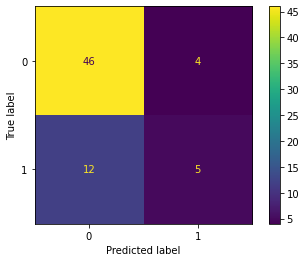

In [35]:
plot_confusion_matrix(rf_class, X_test, y_test)

In [36]:
rf_class.feature_importances_

array([0.01917145, 0.03679073, 0.00927753, 0.0458926 , 0.02261181,
       0.03052992, 0.03703676, 0.14301757, 0.29013944, 0.02002139,
       0.05031163, 0.02846164, 0.00595496, 0.02438551, 0.02487756,
       0.04817875, 0.03036924, 0.01903904, 0.01905245, 0.05012155,
       0.00647222, 0.03828628])

In [37]:
rf_class.feature_importances_.sum()

1.0

In [38]:
f = pd.DataFrame(data=rf_class.feature_importances_, index=features)
f.sort_values(by=[0], ascending=False)

,0
Annual income (including any social welfare programs) in USD,0.290139
Total gaps in resume in months,0.143018
Annual income from social welfare programs,0.050312
Panic_attacks,0.050122
Anxiety,0.048179
I am legally disabled,0.045893
Tiredness,0.038286
I have a gap in my resume,0.037037
I have my own computer separate from a smart phone,0.036791
I live with my parents,0.030530


### Add Cross Validataion
#### Since we have imbalanced classes, stratify the folds using StratifiedKFold

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline

In [40]:
def run_cv_rf(X, y):
    pipe = make_pipeline(RandomForestClassifier())
    skf = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)
    scores = cross_val_score(pipe, X, y, cv=skf, scoring='accuracy')
    print(f'Accuracy Scores: {scores}')
    print(f'\tMean:{scores.mean()}')
    scores = cross_val_score(pipe, X, y, cv=skf, scoring='recall')
    print(f'Recall Scores: {scores}')
    print(f'\tMean:{scores.mean()}')
    scores = cross_val_score(pipe, X, y, cv=skf, scoring='f1')
    print(f'F1 Scores: {scores}')
    print(f'\tMean:{scores.mean()}')

run_cv_rf(X, y)

Accuracy Scores: [0.71641791 0.74626866 0.75757576 0.8030303  0.71212121]
	Mean:0.7470827679782903
Recall Scores: [0.33333333 0.47058824 0.35294118 0.29411765 0.47058824]
	Mean:0.38431372549019616
F1 Scores: [0.375      0.4516129  0.46153846 0.44444444 0.44444444]
	Mean:0.4354080507306314


## Drop Unwanted Cols
### Should I remove Annual Income data?
- Seems like it havin it in the features would make the model misleadingly better.
- However, there is a much weaker correlation between these 2 features and the target 'I am unemplyed'

In [41]:
numeric_features = [x for x in numeric_features if x not in ['Annual income (including any social welfare programs) in USD', 'Annual income from social welfare programs']]

In [43]:
y = data['I am unemployed']
X = data[numeric_features]
X

,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,I read outside of work and school,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness
0,0,0,0,0,1,0,1,24,1,0,0,0,1,1,1,1,0,1,0,0
1,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1
2,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,1,1,11,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,1,33,1,0,0,4,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
328,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
329,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
330,1,0,1,1,1,1,1,30,1,1,0,3,1,1,1,1,1,1,1,1


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=17, stratify=y)
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.6865671641791045

As expected, the accuracy drops when income data is removed

In [45]:
y_pred = rf_model.predict(X_test)
recall_score(y_test, y_pred)

0.11764705882352941

Ouch, recall drops more and is terrible!

In [46]:
run_cv_rf(X, y)

Accuracy Scores: [0.70149254 0.80597015 0.75757576 0.77272727 0.68181818]
	Mean:0.7439167797376752
Recall Scores: [0.27777778 0.47058824 0.17647059 0.23529412 0.35294118]
	Mean:0.30261437908496736
F1 Scores: [0.35714286 0.5625     0.16       0.33333333 0.33333333]
	Mean:0.3492619047619048


Again, all scores are lower after dropping income data.

# Finish Preprocessing
## One-Hot Encoding
### Get Dummies approach

In [47]:
#data.drop('Device Type', axis=1, inplace=True)

In [48]:
dummy_data = pd.get_dummies(data)
dummy_data

,Start Date,End Date,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Education_Completed Masters,Education_Completed Phd,Education_Completed Undergraduate,Education_High School or GED,Education_Some Phd,Education_Some Undergraduate,Education_Some highschool,Education_Some Masters,Age_18-29,Age_30-44,Age_45-60,Age_> 60,Gender_Female,Gender_Male,"Household Income_$0-$9,999","Household Income_$10,000-$24,999","Household Income_$100,000-$124,999","Household Income_$125,000-$149,999","Household Income_$150,000-$174,999","Household Income_$175,000-$199,999","Household Income_$200,000+","Household Income_$25,000-$49,999","Household Income_$50,000-$74,999","Household Income_$75,000-$99,999",Household Income_Prefer not to answer,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet
0,2018-01-15 03:45:16,2018-01-15 03:48:24,0,0,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2018-01-15 03:17:52,2018-01-15 03:18:57,1,1,0,0,1,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,2018-01-15 03:10:28,2018-01-15 03:12:49,0,1,0,0,1,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,2018-01-15 02:11:16,2018-01-15 02:12:33,0,1,0,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2018-01-15 01:24:12,2018-01-15 01:26:34,1,1,1,35,1,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2018-01-14 03:34:38,2018-01-14 03:36:44,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
328,2018-01-14 03:34:38,2018-01-14 03:36:09,0,1,0,0,1,0,1,1,0,0,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
329,2018-01-14 03:27:20,2018-01-14 03:33:01,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
330,2018-01-14 03:29:31,2018-01-14 03:32:45,1,0,1,1,0,1,1,1,1,30,12,1,1,12,1,0,3,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [49]:
cat_features = [col for col in data.columns if data[col].dtype == 'object']

In [50]:
cat_features

['Education', 'Age', 'Gender', 'Household Income', 'Region', 'Device Type']

### SKLearn OneHotEncoder Approach

In [51]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(sparse=False)
oh_data = oh_encoder.fit_transform(data[cat_features])
oh_data.shape

(332, 39)

In [52]:
oh_encoder.categories_

[array(['Completed Masters', 'Completed Phd', 'Completed Undergraduate',
        'High School or GED', 'Some Phd', 'Some Undergraduate',
        'Some highschool', 'Some\xa0Masters'], dtype=object),
 array(['18-29', '30-44', '45-60', '> 60'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['$0-$9,999', '$10,000-$24,999', '$100,000-$124,999',
        '$125,000-$149,999', '$150,000-$174,999', '$175,000-$199,999',
        '$200,000+', '$25,000-$49,999', '$50,000-$74,999',
        '$75,000-$99,999', 'Prefer not to answer'], dtype=object),
 array(['East North Central', 'East South Central', 'Middle Atlantic',
        'Mountain', 'New England', 'Pacific', 'South Atlantic',
        'West North Central', 'West South Central'], dtype=object),
 array(['Android Phone / Tablet', 'MacOS Desktop / Laptop', 'Other',
        'Windows Desktop / Laptop', 'iOS Phone / Tablet'], dtype=object)]

In [53]:
# create column headers for onehot encoded data
col_headers = []
for i, cat in enumerate(oh_encoder.categories_):
    for label in cat:
        col_headers.append(cat_features[i] + '_' + label)
        
col_headers

['Education_Completed Masters',
 'Education_Completed Phd',
 'Education_Completed Undergraduate',
 'Education_High School or GED',
 'Education_Some Phd',
 'Education_Some Undergraduate',
 'Education_Some highschool',
 'Education_Some\xa0Masters',
 'Age_18-29',
 'Age_30-44',
 'Age_45-60',
 'Age_> 60',
 'Gender_Female',
 'Gender_Male',
 'Household Income_$0-$9,999',
 'Household Income_$10,000-$24,999',
 'Household Income_$100,000-$124,999',
 'Household Income_$125,000-$149,999',
 'Household Income_$150,000-$174,999',
 'Household Income_$175,000-$199,999',
 'Household Income_$200,000+',
 'Household Income_$25,000-$49,999',
 'Household Income_$50,000-$74,999',
 'Household Income_$75,000-$99,999',
 'Household Income_Prefer not to answer',
 'Region_East North Central',
 'Region_East South Central',
 'Region_Middle Atlantic',
 'Region_Mountain',
 'Region_New England',
 'Region_Pacific',
 'Region_South Atlantic',
 'Region_West North Central',
 'Region_West South Central',
 'Device Type_Android

In [54]:
# How do I join this back to the main dataframe? Need to create the column headers from the .categories_ somehow
oh_df = pd.DataFrame(data=oh_data, columns=col_headers)
oh_df

,Education_Completed Masters,Education_Completed Phd,Education_Completed Undergraduate,Education_High School or GED,Education_Some Phd,Education_Some Undergraduate,Education_Some highschool,Education_Some Masters,Age_18-29,Age_30-44,Age_45-60,Age_> 60,Gender_Female,Gender_Male,"Household Income_$0-$9,999","Household Income_$10,000-$24,999","Household Income_$100,000-$124,999","Household Income_$125,000-$149,999","Household Income_$150,000-$174,999","Household Income_$175,000-$199,999","Household Income_$200,000+","Household Income_$25,000-$49,999","Household Income_$50,000-$74,999","Household Income_$75,000-$99,999",Household Income_Prefer not to answer,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
328,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
329,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
330,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [55]:
encoded_data = data.drop(columns=cat_features, axis=1)
encoded_data.head()

,Start Date,End Date,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness
0,2018-01-15 03:45:16,2018-01-15 03:48:24,0,0,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0
1,2018-01-15 03:17:52,2018-01-15 03:18:57,1,1,0,0,1,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1
2,2018-01-15 03:10:28,2018-01-15 03:12:49,0,1,0,0,1,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-01-15 02:11:16,2018-01-15 02:12:33,0,1,0,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-01-15 01:24:12,2018-01-15 01:26:34,1,1,1,35,1,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1


## Merge the OH data with the original df

In [56]:
encoded_data = pd.concat([encoded_data, oh_df], axis=1)
encoded_data

,Start Date,End Date,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Education_Completed Masters,Education_Completed Phd,Education_Completed Undergraduate,Education_High School or GED,Education_Some Phd,Education_Some Undergraduate,Education_Some highschool,Education_Some Masters,Age_18-29,Age_30-44,Age_45-60,Age_> 60,Gender_Female,Gender_Male,"Household Income_$0-$9,999","Household Income_$10,000-$24,999","Household Income_$100,000-$124,999","Household Income_$125,000-$149,999","Household Income_$150,000-$174,999","Household Income_$175,000-$199,999","Household Income_$200,000+","Household Income_$25,000-$49,999","Household Income_$50,000-$74,999","Household Income_$75,000-$99,999",Household Income_Prefer not to answer,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet
0,2018-01-15 03:45:16,2018-01-15 03:48:24,0,0,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2018-01-15 03:17:52,2018-01-15 03:18:57,1,1,0,0,1,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2018-01-15 03:10:28,2018-01-15 03:12:49,0,1,0,0,1,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2018-01-15 02:11:16,2018-01-15 02:12:33,0,1,0,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2018-01-15 01:24:12,2018-01-15 01:26:34,1,1,1,35,1,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2018-01-14 03:34:38,2018-01-14 03:36:44,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
328,2018-01-14 03:34:38,2018-01-14 03:36:09,0,1,0,0,1,0,1,1,0,0,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
329,2018-01-14 03:27:20,2018-01-14 03:33:01,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

## Feature Engineering

In [57]:
encoded_data['response_time'] = encoded_data['End Date'] - encoded_data['Start Date']
encoded_data['response_time'] = encoded_data['response_time'].apply(lambda x : x.total_seconds())
encoded_data.drop(['Start Date', 'End Date'], axis=1, inplace=True)
encoded_data.head()

,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Education_Completed Masters,Education_Completed Phd,Education_Completed Undergraduate,Education_High School or GED,Education_Some Phd,Education_Some Undergraduate,Education_Some highschool,Education_Some Masters,Age_18-29,Age_30-44,Age_45-60,Age_> 60,Gender_Female,Gender_Male,"Household Income_$0-$9,999","Household Income_$10,000-$24,999","Household Income_$100,000-$124,999","Household Income_$125,000-$149,999","Household Income_$150,000-$174,999","Household Income_$175,000-$199,999","Household Income_$200,000+","Household Income_$25,000-$49,999","Household Income_$50,000-$74,999","Household Income_$75,000-$99,999",Household Income_Prefer not to answer,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet,response_time
0,0,0,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,188.0
1,1,1,0,0,1,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,65.0
2,0,1,0,0,1,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,141.0
3,0,1,0,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,77.0
4,1,1,1,35,1,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,142.0


# Analysis With Fully Encoded Data

## Basic EDA
more in depth approaches were done with Tableau

In [58]:
corr_mat = encoded_data.corr()
print(type(corr_mat))
corr_mat

<class 'pandas.core.frame.DataFrame'>


,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Education_Completed Masters,Education_Completed Phd,Education_Completed Undergraduate,Education_High School or GED,Education_Some Phd,Education_Some Undergraduate,Education_Some highschool,Education_Some Masters,Age_18-29,Age_30-44,Age_45-60,Age_> 60,Gender_Female,Gender_Male,"Household Income_$0-$9,999","Household Income_$10,000-$24,999","Household Income_$100,000-$124,999","Household Income_$125,000-$149,999","Household Income_$150,000-$174,999","Household Income_$175,000-$199,999","Household Income_$200,000+","Household Income_$25,000-$49,999","Household Income_$50,000-$74,999","Household Income_$75,000-$99,999",Household Income_Prefer not to answer,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet,response_time
I identify as having a mental illness,1.000000,-0.124569,0.438702,0.285140,-0.067346,0.236531,-0.079559,0.143277,0.248902,0.218366,-0.068940,0.133062,0.042875,0.067722,0.076414,0.015357,0.126401,0.365467,0.566523,0.711796,0.421187,0.438978,0.440670,0.399410,0.283889,0.008686,-0.016880,-0.059357,-0.039169,-0.042608,0.118253,-0.016880,0.004092,0.202887,0.147918,-0.120939,-0.202183,0.064777,-0.064777,0.150340,0.134901,-0.021298,-0.028130,-0.048133,-0.043863,0.034950,-0.024180,0.023627,-0.116564,-0.091954,-0.040332,0.103749,0.009517,0.054630,-0.001743,0.018667,-0.128978,-0.004812,0.054630,0.087678,0.060291,-0.043863,-0.101384,-0.006425,-0.045063
I have my own computer separate from a smart phone,-0.124569,1.000000,-0.125153,-0.132710,0.128090,-0.115848,0.217577,-0.129558,-0.181248,-0.166416,0.095642,-0.209314,0.009193,-0.022781,-0.226461,-0.007219,-0.016193,-0.038905,-0.204402,-0.105903,-0.127750,-0.176252,-0.097106,-0.074816,-0.011967,0.079158,-0.038962,0.129223,-0.116238,0.059800,-0.076195,-0.144989,0.073696,-0.085305,-0.181641,0.109416,0.150862,-0.104118,0.104118,-0.260057,0.038888,0.071243,0.085633,0.079850,0.029627,0.096353,-0.053831,-0.042989,0.096144,-0.033947,0.008241,0.054754,0.026238,0.032183,0.024442,-0.083422,-0.023804,-0.063317,0.032183,-0.307408,0.036254,0.029627,0.229736,0.035615,-0.039277
I have been hospitalized before for my mental illness,0.438702,-0.125153,1.000000,0.532061,-0.161094,0.315345,-0.063684,0.078631,0.223006,0.181463,-0.048637,0.185914,0.031978,0.179232,0.192774,0.113295,0.359713,0.155649,0.248491,0.339456,0.361236,0.247352,0.321223,0.267187,0.155472,-0.056077,-0.051369,-0.018454,0.001895,-0.045803,0.067027,0.079819,0.003618,0.059464,0.075307,-0.067469,-0.059378,0.049798,-0.049798,0.123680,0.123408,0.005216,-0.013244,-0.061161,-0.022693,-0.026682,0.018743,-0.043520,-0.059367,-0.069581,0.002644,-0.023552,0.108214,-0.057212,0.016370,0.045353,-0.083881,0.056755,-0.057212,0.142728,0.048508,-0.022693,-0.079287,-0.081967,0.111325
How many days were you hospitalized for your mental illness,0.285140,-0.132710,0.532061,1.000000,-0.127200,0.241055,-0.043228,0.145203,0.168487,0.106685,-0.028543,0.133615,-0.042622,0.089587,0.014959,0.035243,0.5837

In [59]:
corr_mat.loc['I identify as having a mental illness'].sort_values(ascending=False)

I identify as having a mental illness                 1.000000
Depression                                            0.711796
Anxiety                                               0.566523
Panic_attacks                                         0.440670
Mood_swings                                           0.438978
                                                        ...   
Household Income_$75,000-$99,999                     -0.116564
Age_45-60                                            -0.120939
I have my own computer separate from a smart phone   -0.124569
Region_South Atlantic                                -0.128978
Age_> 60                                             -0.202183
Name: I identify as having a mental illness, Length: 65, dtype: float64

##### What is the correlation between having a mental health illness and unemployment?

In [60]:
corr_mat.loc['I identify as having a mental illness']['I am unemployed']

0.13306219561789548

##### What cols should be dropped due to colinearity?
- part-time employ question?
- 

<AxesSubplot:>

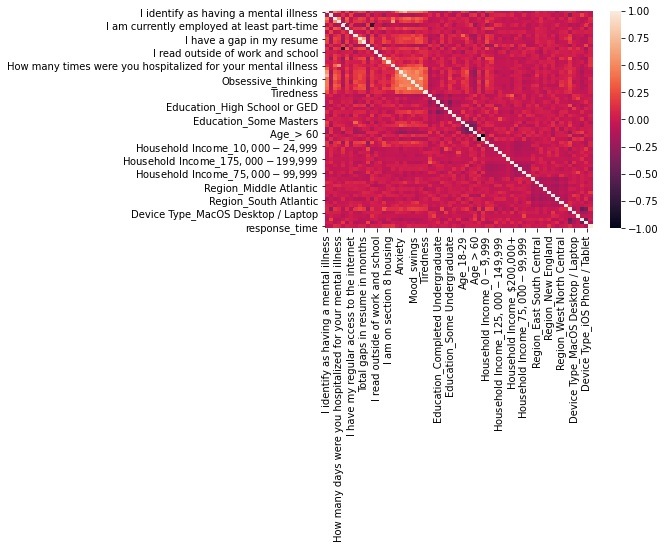

In [61]:
import seaborn as sns

sns.heatmap(encoded_data.corr())

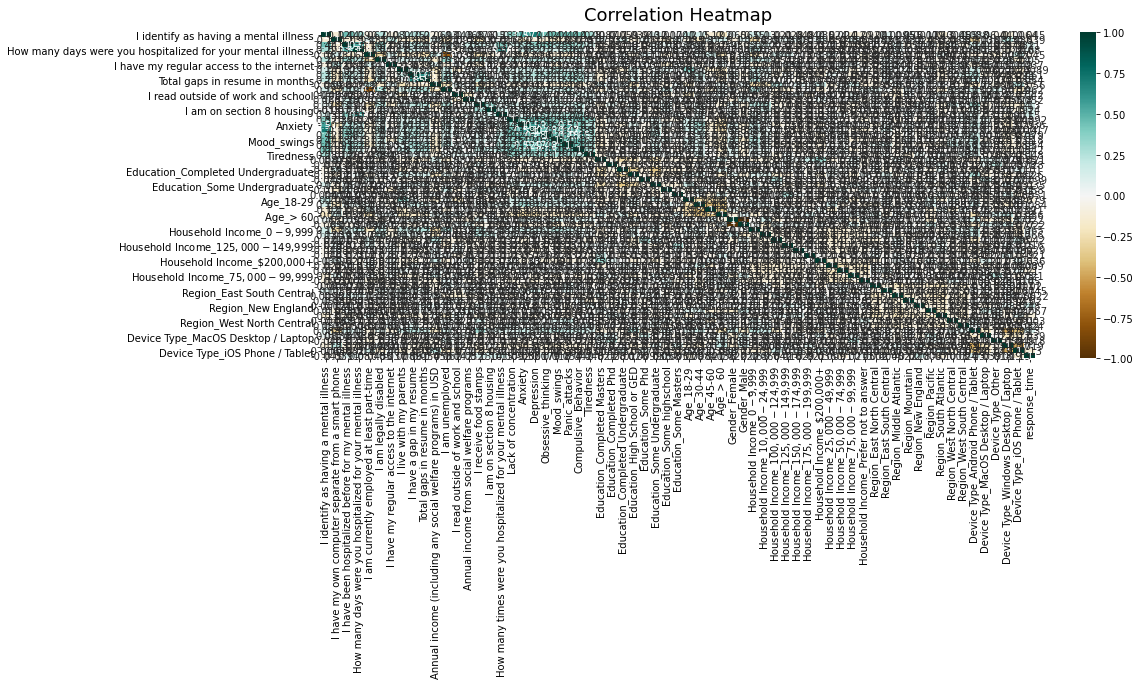

In [62]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(encoded_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

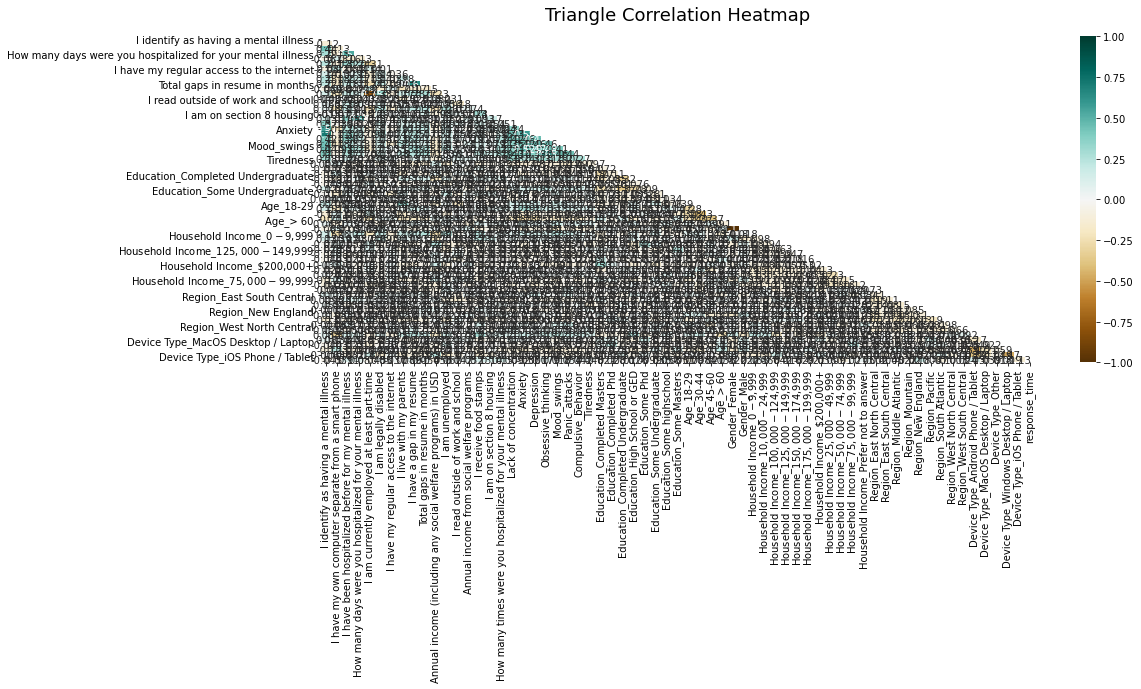

In [63]:
plt.figure(figsize=(16, 6))# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(encoded_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(encoded_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [64]:
encoded_data.corr()[['I am unemployed']].sort_values(by='I am unemployed', ascending=False)

,I am unemployed
I am unemployed,1.000000
I am legally disabled,0.332086
Total gaps in resume in months,0.273059
"Household Income_$0-$9,999",0.262685
I receive food stamps,0.257080
...,...
Region_South Atlantic,-0.145868
Device Type_iOS Phone / Tablet,-0.185106
I have my own computer separate from a smart phone,-0.209314
Annual income (including any social welfare programs) in USD,-0.225206


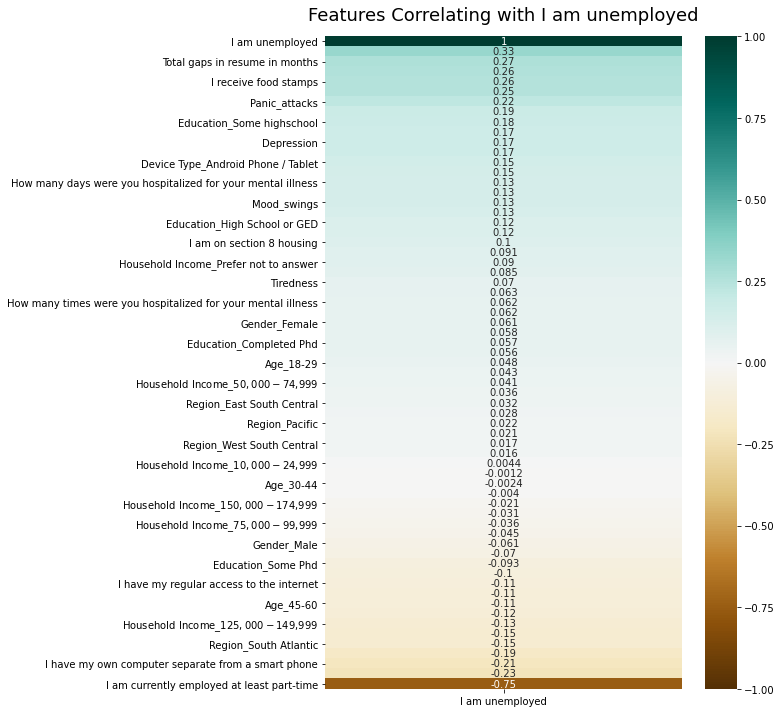

In [65]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(encoded_data.corr()[['I am unemployed']].sort_values(by='I am unemployed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with I am unemployed', fontdict={'fontsize':18}, pad=16);

<AxesSubplot:>

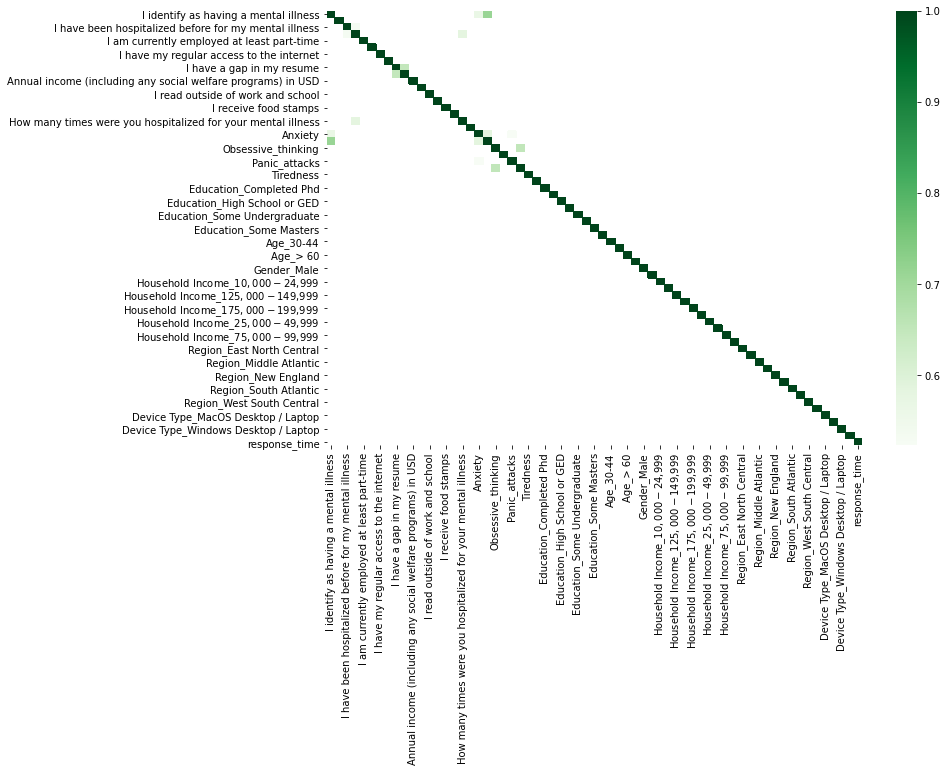

In [66]:
corr = encoded_data.corr()

kot = corr[corr>=.5]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [67]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(encoded_data, 10))

Top Absolute Correlations
Gender_Female                                                Gender_Male                                                     1.000000
I am currently employed at least part-time                   I am unemployed                                                 0.745363
I identify as having a mental illness                        Depression                                                      0.711796
Obsessive_thinking                                           Compulsive_behavior                                             0.652469
I have a gap in my resume                                    Total gaps in resume in months                                  0.647831
Anxiety                                                      Depression                                                      0.585887
How many days were you hospitalized for your mental illness  How many times were you hospitalized for your mental illness    0.583717
I identify as having a mental illnes

# Feature Reduction Impact
- use PCA to reduce number of features and evaluate impact on model perf

In [68]:
y = encoded_data['I am unemployed']
X = encoded_data.drop(['I am unemployed'], axis=1)

In [69]:
X

,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Education_Completed Masters,Education_Completed Phd,Education_Completed Undergraduate,Education_High School or GED,Education_Some Phd,Education_Some Undergraduate,Education_Some highschool,Education_Some Masters,Age_18-29,Age_30-44,Age_45-60,Age_> 60,Gender_Female,Gender_Male,"Household Income_$0-$9,999","Household Income_$10,000-$24,999","Household Income_$100,000-$124,999","Household Income_$125,000-$149,999","Household Income_$150,000-$174,999","Household Income_$175,000-$199,999","Household Income_$200,000+","Household Income_$25,000-$49,999","Household Income_$50,000-$74,999","Household Income_$75,000-$99,999",Household Income_Prefer not to answer,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet,response_time
0,0,0,0,0,0,0,1,0,1,24,35,1,0,0,0,0,1,1,1,1,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,188.0
1,1,1,0,0,1,0,1,0,0,1,22,1,0,0,0,0,1,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,65.0
2,0,1,0,0,1,0,1,0,0,0,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,141.0
3,0,1,0,0,0,0,1,1,1,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,77.0
4,1,1,1,35,1,1,1,0,1,33,32,1,30,0,0,4,1,1,1,1,1,1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,126.0
328,0,1,0,0,1,0,1,1,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,91.0
329,0,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,341.0
330,1,0,1,1,0,1,1,1,1,30,12,1,12,1,0,3,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,194.0


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=17, stratify=y)

enc_rf_model = RandomForestClassifier()
enc_rf_model.fit(X_train, y_train)
enc_rf_model.score(X_test, y_test)

0.8805970149253731

In [72]:
y_pred = enc_rf_model.predict(X_test)
recall_score(y_test, y_pred)

0.5882352941176471

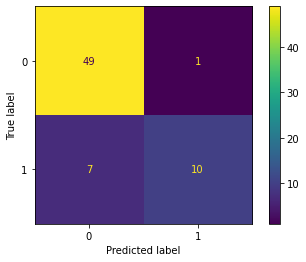

In [74]:
plot_confusion_matrix(enc_rf_model, X_test, y_test)

So False Negatives are the main error the model makes. This is reflected in the recall score wich is the total posi

In [75]:
run_cv_rf(X, y)

Accuracy Scores: [0.92537313 0.91044776 0.83333333 0.90909091 0.84848485]
	Mean:0.8853459972862957
Recall Scores: [0.72222222 0.76470588 0.70588235 0.82352941 0.52941176]
	Mean:0.7091503267973855
F1 Scores: [0.77419355 0.8125     0.66666667 0.8        0.68965517]
	Mean:0.7486030774935114


## Does Scaling/Standardizing make a difference?


## How does class balancing affect performance?